Let's first install and import the necessary packages for this colab.


In [1]:
!pip install -q tensorflow==1.15.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-recommenders 0.5.2 requires tensorflow>=2.3.0, but you have tensorflow 1.15.0 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

In [4]:
import pandas as pd
import numpy as np

We can generate the data for this as follows:


## Movielens latest small

### Data processing

The data processing procedure follows a similar procedure as the [basic ranking tutorial](https://www.tensorflow.org/recommenders/examples/basic_ranking).

In [6]:
# ratings = tfds.load('movielens/1m-ratings', split="train")

In [5]:
path = 'ml-1m/'

In [6]:
ratings = pd.read_csv(path+'ratings.csv')

In [7]:
ratings.shape

(1000209, 4)

In [8]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [9]:
ratings = ratings[['user_id','movie_id','rating']]

In [12]:
np.float32(6)

6.0

In [13]:
final_movie_id = [str(i) for i in ratings.movie_id]
final_user_id = [str(i) for i in ratings.user_id]
final_rating =  [np.float32(i) for i in ratings.rating ]

In [14]:
len(final_rating)

1000209

In [15]:
ratings.shape

(1000209, 3)

In [16]:
ratings.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

In [18]:
N = len(final_movie_id)

In [19]:
metadata = {
    'movie_id': final_movie_id,
    'user_id': final_user_id,
    'user_rating': final_rating,
    }
num_samples = N

def meta_dict_gen():
    for i in range(num_samples):
        ls = {}
        for key, val in metadata.items():
            ls[key] = val[i]
        yield ls

dataset = tf.data.Dataset.from_generator(
    meta_dict_gen,
    output_types={"movie_id": tf.string, "user_id": tf.string, "user_rating": tf.float32},
    output_shapes={"movie_id": (), "user_id": (), "user_rating": ()})

In [20]:
# ratings['rating'] = ratings.rating.astype(np.float32)
# # ratings['user_id'] = ratings.rating.astype(int).astype(str)
# # ratings['movie_id'] = ratings.rating.astype(int).astype(str)

In [21]:
ratings.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

In [24]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5.0
1,1,661,3.0
2,1,914,3.0
3,1,3408,4.0
4,1,2355,5.0


In [25]:
ratings.tail()

,user_id,movie_id,rating
1000204,6040,1091,1.0
1000205,6040,1094,5.0
1000206,6040,562,5.0
1000207,6040,1096,4.0
1000208,6040,1097,4.0


In [26]:
type(ratings)

pandas.core.frame.DataFrame

In [22]:
# ratings = tf.data.Dataset.from_tensor_slices(ratings)

In [28]:
type(ratings)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [29]:
for x in ratings.take(5):
  print (x)

tf.Tensor([1.000e+00 1.193e+03 5.000e+00], shape=(3,), dtype=float64)
tf.Tensor([  1. 661.   3.], shape=(3,), dtype=float64)
tf.Tensor([  1. 914.   3.], shape=(3,), dtype=float64)
tf.Tensor([1.000e+00 3.408e+03 4.000e+00], shape=(3,), dtype=float64)
tf.Tensor([1.000e+00 2.355e+03 5.000e+00], shape=(3,), dtype=float64)


In [30]:
# # Replace heart.csv with the filepath of your CSV file
# filepath = path+'ratings.csv'
# # Replace AHD with the name of the column that your labels are placed
# label_col = "rating"
# # And this dataset can be used just like the others
# ratings = tf.data.experimental.make_csv_dataset(
#     filepath,
#     batch_size=1,
    
    
# )

In [31]:
type(ratings)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [32]:
# ratings = tfds.load('movielens/latest-small-ratings', split="train")
# movies = tfds.load('movielens/latest-small-movies', split="train")

# # Select the basic features.
# ratings = ratings.map(lambda x: {
#     "movie_id": x["movie_id"],
#     "user_id": x["user_id"],
#     "timestamp": int(x["timestamp"]),
#     "user_rating": x["user_rating"]
# })
# movies = movies.map(lambda x: {
#     "movie_id": x["movie_id"],
#     "movie_title": x["movie_title"]
# })

In [33]:
# for x in movies.take(1).as_numpy_iterator():
#   pprint.pprint(x)

In [23]:
# for x in ratings.take(1).as_numpy_iterator():
#   pprint.pprint(x)

In [25]:
# for x in ratings.take(5).as_numpy_iterator():
#   pprint.pprint(x)

In [26]:
# ratings = ratings.map(lambda x: {
#     "movie_id": x["movie_id"],
#     "user_id": x["user_id"],
#     "user_rating": x["user_rating"],
#     "user_gender": int(x["user_gender"]),
#     "user_zip_code": x["user_zip_code"],
#     "user_occupation_text": x["user_occupation_text"],
#     "movie_title": x["movie_title"],
#     "timestamp": int(x["timestamp"]),
#     "bucketized_user_age": int(x["bucketized_user_age"]),
# })

# ratings = ratings.map(lambda x: {
#     "movie_id": x[1],
#     "user_id": x[0],
#     "user_rating": x[2]
# })
ratings = dataset.map(lambda x: {
    "movie_id": x["movie_id"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"]
})

In [27]:
for x in ratings.take(5).as_numpy_iterator():
  pprint.pprint(x)

{'movie_id': b'1193', 'user_id': b'1', 'user_rating': 5.0}
{'movie_id': b'661', 'user_id': b'1', 'user_rating': 3.0}
{'movie_id': b'914', 'user_id': b'1', 'user_rating': 3.0}
{'movie_id': b'3408', 'user_id': b'1', 'user_rating': 4.0}
{'movie_id': b'2355', 'user_id': b'1', 'user_rating': 5.0}


In [37]:
# ratings = tfds.load("movie_lens/100k-ratings", split="train")
# ratings = ratings.map(lambda x: {
#     "movie_id": x["movie_id"],
#     "user_id": x["user_id"],
#     "user_rating": x["user_rating"],
#     "user_gender": int(x["user_gender"]),
#     "user_zip_code": x["user_zip_code"],
#     "user_occupation_text": x["user_occupation_text"],
#     "bucketized_user_age": int(x["bucketized_user_age"]),
# })

Next, we randomly split the data into 90% for training and 10% for testing.


In [38]:
1000209*80/100

800167.2

In [39]:
1000209*0.

800167.2000000001

In [28]:
print(ratings.cardinality().numpy())

-2


In [29]:
train_size = N *90//100
test_size = N*10//100

print(train_size,test_size)

900188 100020


In [30]:
test_size = 100021

In [42]:
1000209 - 800167

200042

In [43]:
900188  + 100021

1000209

In [31]:
# train_size = 900188
# test_size = 100021

In [32]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(10_00_209, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(train_size)
test = shuffled.skip(train_size).take(test_size)

Then, we create vocabulary for each feature.

In [33]:
%%time

# feature_names = ["movie_id", "user_id", "user_gender", "user_zip_code",
#                  "user_occupation_text", "movie_title", "timestamp", "bucketized_user_age",]

feature_names = ["movie_id", "user_id"]

vocabularies = {}

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [34]:
from tqdm import tqdm

In [35]:
%%time
for feature_name in tqdm(feature_names):
    vocab = ratings.batch(1000).map(lambda x: x[feature_name])
    vocabularies[feature_name] = np.unique(np.concatenate(list(vocab)))
    # current contents of your for loop

  0%|          | 0/2 [00:00<?, ?it/s]

Cause: could not parse the source code of <function <lambda> at 0x7f4de41158c8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f4de41158c8>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


 50%|█████     | 1/2 [02:47<02:47, 167.31s/it]

Cause: could not parse the source code of <function <lambda> at 0x7f4de40aaf28>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f4de40aaf28>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


100%|██████████| 2/2 [05:36<00:00, 168.04s/it]

CPU times: user 5min 38s, sys: 51.6 s, total: 6min 30s
Wall time: 5min 36s


In [ ]:
# for feature_name in feature_names:
#   vocab = ratings.batch(1000).map(lambda x: x[feature_name])
#   vocabularies[feature_name] = np.unique(np.concatenate(list(vocab)))
# #print(vocabularies)

### Model construction

The model architecture we will be building starts with an embedding layer, which is fed into a cross network followed by a deep network. The embedding dimension is set to 32 for all the features. You could also use different embedding sizes for different features.

In [36]:
class DCN(tfrs.Model):

  def __init__(self, use_cross_layer, deep_layer_sizes, projection_dim=None):
    super().__init__()

    self.embedding_dimension = 32

#     str_features = ["movie_id", "user_id", "user_zip_code", "movie_title",
#                     "user_occupation_text"]
#     int_features = ["timestamp","user_gender", "bucketized_user_age"]
    
    str_features = ["movie_id", "user_id"]
    int_features = []

    self._all_features = str_features + int_features
    self._embeddings = {}

    # Compute embeddings for string features.
    for feature_name in str_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.experimental.preprocessing.StringLookup(
              vocabulary=vocabulary, mask_token=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])
      
    # Compute embeddings for int features.
    for feature_name in int_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.experimental.preprocessing.IntegerLookup(
              vocabulary=vocabulary, mask_value=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])

    if use_cross_layer:
      self._cross_layer = tfrs.layers.dcn.Cross(
          projection_dim=projection_dim,
          kernel_initializer="glorot_uniform")
    else:
      self._cross_layer = None

    self._deep_layers = [tf.keras.layers.Dense(layer_size, activation="relu")
      for layer_size in deep_layer_sizes]

    self._logit_layer = tf.keras.layers.Dense(1)

    self.task = tfrs.tasks.Ranking(
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError("RMSE")]
    )

  def call(self, features):
    # Concatenate embeddings
    embeddings = []
    for feature_name in self._all_features:
      embedding_fn = self._embeddings[feature_name]
      embeddings.append(embedding_fn(features[feature_name]))

    x = tf.concat(embeddings, axis=1)

    # Build Cross Network
    if self._cross_layer is not None:
      x = self._cross_layer(x)
    
    # Build Deep Network
    for deep_layer in self._deep_layers:
      x = deep_layer(x)

    return self._logit_layer(x)

  def compute_loss(self, features, training=False):
    labels = features.pop("user_rating")
    scores = self(features)
    return self.task(
        labels=labels,
        predictions=scores,
    )

### Model training
We shuffle, batch and cache the training and test data. 


In [37]:
cached_train = train.shuffle(10_00_209).batch(8192).cache()
cached_test = test.batch(4096).cache()

Let's define a function that runs a model multiple times and returns the model's RMSE mean and standard deviation out of multiple runs.

In [39]:
def run_models(use_cross_layer, deep_layer_sizes, auto_encoder_sizes=None, projection_dim=None, num_runs=5, parallel=False, regularization=None,learning_rate=0.01):
  models = []
  rmses = []

  for i in range(num_runs):
    if not parallel:
      model = DCN(use_cross_layer=use_cross_layer,
                deep_layer_sizes=deep_layer_sizes,
                projection_dim=projection_dim)
    else:
      model = DCN_parallel(deep_layer_sizes=deep_layer_sizes,auto_encoder_sizes=auto_encoder_sizes,
                projection_dim=projection_dim, regularization=regularization)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate))
    models.append(model)

    model.fit(cached_train, epochs=epochs, verbose=False)
    metrics = model.evaluate(cached_test, return_dict=True)
    rmses.append(metrics["RMSE"])

  mean, stdv = np.average(rmses), np.std(rmses)

  return {"model": models, "mean": mean, "stdv": stdv}

We set some hyper-parameters for the models. Note that these hyper-parameters are set globally for all the models for demonstration purpose. If you want to obtain the best performance for each model, or conduct a fair comparison among models, then we'd suggest you to fine-tune the hyper-parameters. Remember that the model architecture and optimization schemes are intertwined.

In [40]:
epochs = 8
learning_rate = 0.01

**DCN (stacked).** We first train a DCN model with a stacked structure, that is, the inputs are fed to a cross network followed by a deep network.
<div>
<center>
<img src="http://drive.google.com/uc?export=view&id=1X8qoMtIYKJz4yBYifvfw4QpAwrjr70e_" width="140"/>
</center>
</div>


In [41]:
dcn_result = run_models(use_cross_layer=True, deep_layer_sizes=[192, 192])

25/25 [==============================] - 0s 4ms/step - RMSE: 0.9042 - loss: 0.8166 - regularization_loss: 0.0000e+00 - total_loss: 0.8166


**Low-rank DCN.** To reduce the training and serving cost, we leverage low-rank techniques to approximate the DCN weight matrices. The rank is passed in through argument `projection_dim`; a smaller `projection_dim` results in a lower cost. Note that `projection_dim` needs to be smaller than (input size)/2 to reduce the cost. In practice, we've observed using low-rank DCN with rank (input size)/4 consistently preserved the accuracy of a full-rank DCN.

<div>
<center>
<img src="http://drive.google.com/uc?export=view&id=1ZZfUTNdxjGAaAuwNrweKkLJ1PGxMmiCm" width="400"/>
</center>
</div>


In [24]:
dcn_lr_result = run_models(use_cross_layer=True,
                           projection_dim=20,
                           deep_layer_sizes=[192, 192])

25/25 [==============================] - 0s 8ms/step - RMSE: 1.0359 - loss: 1.0743 - regularization_loss: 0.0000e+00 - total_loss: 1.0743


**DNN.** We train a same-sized DNN model as a reference.

In [25]:
dnn_result = run_models(use_cross_layer=False,
                        deep_layer_sizes=[192, 192, 192])

25/25 [==============================] - 0s 8ms/step - RMSE: 1.0691 - loss: 1.1428 - regularization_loss: 0.0000e+00 - total_loss: 1.1428


Parallel

#### Parallel with encoders

In [42]:
class DCN_parallel(tfrs.Model):

  def __init__(self, deep_layer_sizes, auto_encoder_sizes, regularization=None, projection_dim=None):
    super().__init__()
    self.embedding_dimension = 32

    # str_features = ["movie_id", "user_id", "user_zip_code", "user_occupation_text"]
    # int_features = ["user_gender", "bucketized_user_age"]

#     str_features = ["movie_id", "user_id", "user_zip_code", "movie_title",
#                     "user_occupation_text"]
#     int_features = ["timestamp","user_gender", "bucketized_user_age"]

    str_features = ["movie_id", "user_id"]
    int_features = []


    self._all_features = str_features + int_features
    self._embeddings = {}

    # Compute embeddings for string features.
    for feature_name in str_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.experimental.preprocessing.StringLookup(
              vocabulary=vocabulary, mask_token=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])
      
    # Compute embeddings for int features.
    for feature_name in int_features:
      vocabulary = vocabularies[feature_name]
      self._embeddings[feature_name] = tf.keras.Sequential(
          [tf.keras.layers.experimental.preprocessing.IntegerLookup(
              vocabulary=vocabulary, mask_value=None),
           tf.keras.layers.Embedding(len(vocabulary) + 1,
                                     self.embedding_dimension)
    ])

    self._cross_layer = tfrs.layers.dcn.Cross(
          projection_dim=projection_dim,
          kernel_initializer="glorot_uniform",name="cross_layer")
    
    self._deep_layers = [tf.keras.layers.Dense(layer_size, activation="relu", name="deep_layer")
      for layer_size in deep_layer_sizes]
    
    self.auto_encoder_sizes = auto_encoder_sizes

    if self.auto_encoder_sizes is not None:
      self._autoencoders_layers = [tf.keras.layers.Dense(layer_size, activation="relu", name="autoencoder_layer")
      for layer_size in self.auto_encoder_sizes]

    self._concat_layers = tf.keras.layers.concatenate
    
    if regularization is not None:
        self._logit_layer = tf.keras.layers.Dense(1, name="output_layer",kernel_regularizer=regularization)
    else:
        self._logit_layer = tf.keras.layers.Dense(1, name="output_layer")

    self.task = tfrs.tasks.Ranking(
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError("RMSE")]
    )

  def call(self, features):
    # Concatenate embeddings
    embeddings = []
    for feature_name in self._all_features:
      embedding_fn = self._embeddings[feature_name]
      embeddings.append(embedding_fn(features[feature_name]))

    inp = tf.concat(embeddings, axis=1)

    # print(inp)

    # Build Cross Network
    x = self._cross_layer(inp)
    
    # Build Deep Network 
    for i,deep_layer in enumerate(self._deep_layers):
      if i==0:
        y = deep_layer(inp)
      else:
        y = deep_layer(y)


    #auto encoder
    if self.auto_encoder_sizes is not None:
      for i,autoencoders_layers in enumerate(self._autoencoders_layers):
        if i==0:
          z = autoencoders_layers(inp)
        else:
          z = autoencoders_layers(z)

    # Merge both network
    if self.auto_encoder_sizes is not None:
      out = self._concat_layers([x,y,z],name="concat_layer")
    else:
      out = self._concat_layers([x, y],name="concat_layer")
    # print(out)
    
    out = self._logit_layer(out)
    return out

  def compute_loss(self, features, training=False):
    labels = features.pop("user_rating")
    scores = self(features)
    return self.task(
        labels=labels,
        predictions=scores,
    )


In [44]:
model_tmp = DCN_parallel(deep_layer_sizes=[192, 192, 192],auto_encoder_sizes=[128,64,32,64,128],regularization="l2") #l1,l2

model_tmp.compile(optimizer=tf.keras.optimizers.Adam(0.01))
model_tmp.fit(cached_train, epochs=8, verbose=1)
# model_tmp.evaluate(cached_test)
model_tmp.summary()
# tf.keras.utils.plot_model(model_tmp, "multi_input_and_output_model.png", show_shapes=False)

Epoch 1/8
110/110 [==============================] - 6s 43ms/step - RMSE: 1.4392 - loss: 2.0588 - regularization_loss: 0.0134 - total_loss: 2.0722
Epoch 2/8
110/110 [==============================] - 5s 41ms/step - RMSE: 0.9103 - loss: 0.8286 - regularization_loss: 0.0101 - total_loss: 0.8387
Epoch 3/8
110/110 [==============================] - 5s 42ms/step - RMSE: 0.8964 - loss: 0.8034 - regularization_loss: 0.0081 - total_loss: 0.8115
Epoch 4/8
110/110 [==============================] - 4s 41ms/step - RMSE: 0.8851 - loss: 0.7831 - regularization_loss: 0.0071 - total_loss: 0.7902
Epoch 5/8
110/110 [==============================] - 5s 42ms/step - RMSE: 0.8738 - loss: 0.7634 - regularization_loss: 0.0063 - total_loss: 0.7697
Epoch 6/8
110/110 [==============================] - 5s 42ms/step - RMSE: 0.8625 - loss: 0.7437 - regularization_loss: 0.0057 - total_loss: 0.7494
Epoch 7/8
110/110 [==============================] - 4s 40ms/step - RMSE: 0.8539 - loss: 0.7290 - regularization_loss:

In [41]:
tf.keras.utils.plot_model(model_tmp, "multi_input_and_output_model.png", show_shapes=False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [35]:
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

In [21]:
# tf.keras.utils.plot_model(dcn_result['model'][0], "multi_input_and_output_model.png")

In [30]:
dcn_parallel_result = run_models(use_cross_layer=True,
                        deep_layer_sizes=[192,192,192],parallel=True)

25/25 [==============================] - 0s 9ms/step - RMSE: 0.9823 - loss: 0.9675 - regularization_loss: 0.0000e+00 - total_loss: 0.9675


In [31]:
dcn_parallel2_result = run_models(use_cross_layer=True,
                        deep_layer_sizes=[192,192,192],parallel=True, projection_dim=20)

25/25 [==============================] - 0s 11ms/step - RMSE: 1.1158 - loss: 1.2461 - regularization_loss: 0.0000e+00 - total_loss: 1.2461


In [36]:
dcn_parallel3_result = run_models(use_cross_layer=True,
                        deep_layer_sizes=[192,192,192],auto_encoder_sizes=[64,32,16,32,64] ,parallel=True, projection_dim=20)

25/25 [==============================] - 0s 8ms/step - RMSE: 1.1113 - loss: 1.2384 - regularization_loss: 0.0000e+00 - total_loss: 1.2384


In [52]:
dcn_parallel4_result = run_models(use_cross_layer=True,
                        deep_layer_sizes=[192,192,192],
                        auto_encoder_sizes=[192, 64,32,16,32,64,192], 
                        parallel=True, 
                        regularization="l1",
                        learning_rate=0.001)

25/25 [==============================] - 0s 10ms/step - RMSE: 1.0734 - loss: 1.1568 - regularization_loss: 0.0379 - total_loss: 1.1947


In [50]:
dcn_parallel4_result

{'model': [<__main__.DCN_parallel at 0x7f3ce8a97cc0>,
 'mean': 1.064604640007019,
 'stdv': 0.013844568971256693}

We evaluate the model on test data and report the mean and standard deviation out of 5 runs.

In [33]:
print("DCN             RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_result["mean"], dcn_result["stdv"]))
print("DCN (low-rank)  RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_lr_result["mean"], dcn_lr_result["stdv"]))
print("DNN             RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dnn_result["mean"], dnn_result["stdv"]))
print("DNN (parallel)  RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_parallel_result["mean"], dcn_parallel_result["stdv"]))
print("DNN (parallel2) RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_parallel2_result["mean"], dcn_parallel2_result["stdv"]))

print("DNN (parallel3) RMSE mean: {:.4f}, stdv: {:.4f}".format(
    dcn_parallel3_result["mean"], dcn_parallel3_result["stdv"]))


DCN             RMSE mean: 1.0287, stdv: 0.0125
DCN (low-rank)  RMSE mean: 1.0565, stdv: 0.0437
DNN             RMSE mean: 1.0640, stdv: 0.0214
DNN (parallel)  RMSE mean: 0.9955, stdv: 0.0218
DNN (parallel2) RMSE mean: 1.0710, stdv: 0.0388
DNN (parallel3) RMSE mean: 1.0447, stdv: 0.0608


We see that DCN achieved better performance than a same-sized DNN with ReLU layers. Moreover, the low-rank DCN was able to reduce parameters while maintaining the accuracy.

**More on DCN.** Besides what've been demonstrated above, there are more creative yet practically useful ways to utilize DCN [[1](https://arxiv.org/pdf/2008.13535.pdf)]. 

*   *DCN with a parallel structure*.  The inputs are fed in parallel to a cross network and a deep network.

*   *Concatenating cross layers.* The inputs are fed in parallel to multiple cross layers to capture complementary feature crosses.

<div class="fig figcenter fighighlight">
<center>
  <img src="http://drive.google.com/uc?export=view&id=11RpNuj9s0OgSav9TUuGA7v7PuFLL6nVR" hspace=40 width="600" style="display:block;">
  <div class="figcaption">
  <b>Left</b>: DCN with a parallel structure; <b>Right</b>: Concatenating cross layers. 
  </div>
  </center>
</div>

### Model understanding

The weight matrix $W$ in DCN reveals what feature crosses the model has learned to be important. Recall that in the previous toy example, the importance of interactions between the $i$-th and $j$-th features is captured by the ($i, j$)-th element of $W$.

What's a bit different here is that the feature embeddings are of size 32 instead of size 1. Hence, the importance will be characterized by the $(i, j)$-th block
$W_{i,j}$ which is of dimension 32 by 32.
In the following, we visualize the Frobenius norm [[4](https://en.wikipedia.org/wiki/Matrix_norm)] $||W_{i,j}||_F$ of each block, and a larger norm would suggest higher importance (assuming the features' embeddings are of similar scales).

Besides block norm, we could also visualize the entire matrix, or the mean/median/max value of each block.

<Figure size 648x648 with 0 Axes>

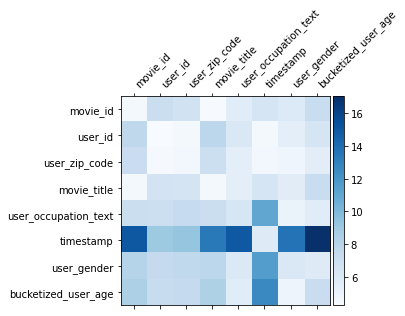

In [34]:
model = dcn_result["model"][4]
mat = model._cross_layer._dense.kernel
features = model._all_features

block_norm = np.ones([len(features), len(features)])

dim = model.embedding_dimension

# Compute the norms of the blocks.
for i in range(len(features)):
  for j in range(len(features)):
    block = mat[i * dim:(i + 1) * dim,
                j * dim:(j + 1) * dim]
    block_norm[i,j] = np.linalg.norm(block, ord="fro")

plt.figure(figsize=(9,9))
im = plt.matshow(block_norm, cmap=plt.cm.Blues)
ax = plt.gca()
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=10) 
_ = ax.set_xticklabels([""] + features, rotation=45, ha="left", fontsize=10)
_ = ax.set_yticklabels([""] + features, fontsize=10)

Test

In [35]:
model.evaluate(cached_test)

25/25 [==============================] - 0s 14ms/step - RMSE: 1.0270 - loss: 1.0550 - regularization_loss: 0.0000e+00 - total_loss: 1.0550


[1.0269559621810913, 1.0606697797775269, 0, 1.0606697797775269]

In [36]:
dcn_result['model'][-1].evaluate(cached_test, return_dict=True)

25/25 [==============================] - 0s 16ms/step - RMSE: 1.0270 - loss: 1.0550 - regularization_loss: 0.0000e+00 - total_loss: 1.0550


{'RMSE': 1.0269559621810913,
 'loss': 1.0606697797775269,
 'regularization_loss': 0,
 'total_loss': 1.0606697797775269}

In [37]:
my_list = [dcn_result, dcn_lr_result, dnn_result, dcn_parallel_result,dcn_parallel2_result, dcn_parallel3_result]
my_model_name = ["DCN Base", "DCN with LR", "DNN ", "Parallel", "Parallel 2", "Parallel 3"]
print('Testing on test data.. ')
for i,name in enumerate(my_list):
  print("#"+str(i)+ " " +str(my_model_name[i]), end=" ")
  result = name['model'][-1].evaluate(cached_test,return_dict=True, verbose=False)
  print('\t\t RMSE: {:.2f}'.format(result['RMSE']))

  # print("DNN (parallel2) RMSE mean: {:.4f}, stdv: {:.4f}".format(dcn_parallel2_result["mean"]))

Testing on test data.. 
#0 DCN Base 		 RMSE: 1.03
#1 DCN with LR 		 RMSE: 1.04
#2 DNN  		 RMSE: 1.07
#3 Parallel 		 RMSE: 0.98
#4 Parallel 2 		 RMSE: 1.12
#5 Parallel 3 		 RMSE: 0.98


In [45]:
model_tmp.predict(cached_test)

array([[4.885335 ],
       [3.4078844],
       [3.990633 ],
       ...,
       [3.7469707],
       [3.7025757],
       [3.5215185]], dtype=float32)

In [46]:
import pandas as pd
my_rating = pd.read_csv('ml-1m/ratings.csv', usecols=["user_id","movie_id","rating"])
my_rating.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [47]:
my_rating.columns = ["userId", "movieId", "rating"]

In [48]:
my_rating.head()

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [19]:
# print(my_rating.groupby("userId").groups)

In [49]:
pref_matrix = my_rating.reset_index()[["userId", "movieId", "rating"]].pivot(index="userId", columns="movieId", values="rating")
pref_matrix = pref_matrix.fillna(0)
pref_matrix.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [50]:
my_test_dict = pref_matrix.to_dict()

In [51]:
userId = list(pref_matrix.index)
movieId = list(pref_matrix.columns)

In [52]:
len(userId), len(movieId)

(6040, 3706)

In [53]:
count =0
final_movie_id = []
final_user_id = []
final_rating = []
for i in my_test_dict.items():
    
    tmp = [i[0] for j in range(len(userId))]
#     print("movie id "+str(tmp))
    final_movie_id.extend(tmp)
    
#     print("user id "+str(list(i[1].keys())))
    final_user_id.extend(list(i[1].keys()))

#     print("ratings id "+str(list(i[1].values())))
    final_rating.extend(list(i[1].values()))
#     count+=1
#     if count>5:
#         break

In [54]:
len(final_movie_id), len(final_user_id), len(final_rating)

(22384240, 22384240, 22384240)

In [55]:
final_movie_id = [str(i) for i in final_movie_id]
final_user_id = [str(i) for i in final_user_id]

In [56]:
N = len(final_movie_id)
# dictionary of arrays:
# metadata = {
#     'bucketized_user_age': "1",
#     'movie_id': '1416',
#     'movie_title': 'Thunderball (1965)',
#     'timestamp': "975658116",
#     'user_gender': "1",
#     'user_id': '1285',
#     'user_occupation_text': 'college/grad student',
#     'user_rating': "4.0",
#     'user_zip_code': '98125'
#     }

metadata = {
    'movie_id': final_movie_id,
    'user_id': final_user_id,
    'user_rating': final_rating,
    }
num_samples = N

def meta_dict_gen():
    for i in range(num_samples):
        ls = {}
        for key, val in metadata.items():
            ls[key] = val[i]
        yield ls

dataset = tf.data.Dataset.from_generator(
    meta_dict_gen,
    output_types={"movie_id": tf.string, "user_id": tf.string, "user_rating": tf.float32},
    output_shapes={"movie_id": (), "user_id": (), "user_rating": ()})

In [104]:
# dataset = dataset.map(lambda x: {
#     "movie_id": x["movie_id"],
#     "user_id": x["user_id"],
#     "user_rating": x["user_rating"],
#     "user_gender": int(x["user_gender"]),
#     "user_zip_code": x["user_zip_code"],
#     "user_occupation_text": x["user_occupation_text"],
#     "movie_title": x["movie_title"],
#     "timestamp": int(x["timestamp"]),
#     "bucketized_user_age": int(x["bucketized_user_age"]),
# })

dataset = dataset.map(lambda x: {
    "movie_id": x["movie_id"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"]
})

In [57]:
for x in dataset.batch(1).take(2).as_numpy_iterator():
  pprint.pprint(x)

{'movie_id': array([b'1'], dtype=object),
 'user_id': array([b'1'], dtype=object),
 'user_rating': array([5.], dtype=float32)}
{'movie_id': array([b'1'], dtype=object),
 'user_id': array([b'2'], dtype=object),
 'user_rating': array([0.], dtype=float32)}


In [58]:
22384240/4096

5464.90234375

In [59]:
cached_test_dataset = dataset.batch(4096).cache()

In [60]:
%%time

preds = model_tmp.predict(cached_test_dataset,verbose=True)
preds = preds.flatten()

5465/5465 [==============================] - 3929s 719ms/step
CPU times: user 1h 6min 24s, sys: 9min 38s, total: 1h 16min 2s
Wall time: 1h 5min 29s


In [61]:
final_predicted_rating = [i for i in preds.flatten()]

In [62]:
len(final_predicted_rating)

22384240

In [63]:
final_predicted_rating[:5]

[4.13801, 4.1889195, 4.1356764, 4.0994115, 3.2076497]

In [64]:
result_df = pd.DataFrame(data = list(zip(final_user_id,final_movie_id,final_rating,final_predicted_rating)),columns=['UserId','movieId','rating','predicted_rating'])

In [65]:
result_df.head()

,UserId,movieId,rating,predicted_rating
0,1,1,5.0,4.138010
1,2,1,0.0,4.188920
2,3,1,0.0,4.135676
3,4,1,0.0,4.099411
4,5,1,0.0,3.207650


In [66]:
result_df['final_score'] = result_df['rating']
result_df.head()

,UserId,movieId,rating,predicted_rating,final_score
0,1,1,5.0,4.138010,5.0
1,2,1,0.0,4.188920,0.0
2,3,1,0.0,4.135676,0.0
3,4,1,0.0,4.099411,0.0
4,5,1,0.0,3.207650,0.0


In [67]:
final2_df = result_df[result_df["final_score"]==0.0]

In [69]:
final2_df.head()

,UserId,movieId,rating,predicted_rating,final_score
1,2,1,0.0,4.188920,0.0
2,3,1,0.0,4.135676,0.0
3,4,1,0.0,4.099411,0.0
4,5,1,0.0,3.207650,0.0
6,7,1,0.0,4.451700,0.0


In [71]:
import os

In [72]:
os.listdir()

['dcn v6-KT.ipynb', '.ipynb_checkpoints', 'ml-1m', 'TFDS']

In [73]:
final2_df.to_pickle("DCN_Result2.pickle")

In [74]:
result_df.to_pickle("DCN_Result.pickle")

In [75]:
temp2 = result_df[result_df['UserId']=="1"].sort_values(by='predicted_rating', ascending=False)[:10]
temp2.head()

,UserId,movieId,rating,predicted_rating,final_score
2567000,1,439,0.0,4.581730,0.0
12176640,1,2197,0.0,4.461979,0.0
19038080,1,3382,0.0,4.457921,0.0
20620560,1,3656,0.0,4.451767,0.0
3370320,1,572,0.0,4.438087,0.0


In [78]:
temp = pd.read_csv(path+'movies.csv')
temp = temp[['movie_id', 'movie']]
temp.columns = ["movieId","title"]

In [79]:
temp.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [80]:


temp["movieId"] = temp["movieId"].astype(str)
temp.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [81]:
finally_final = final2_df.merge(temp,on="movieId",how="left")

In [82]:
finally_final[finally_final['UserId']=="4"].sort_values(by='predicted_rating', ascending=False)[:10]

,UserId,movieId,rating,predicted_rating,final_score,title
18149237,4,3382,0.0,5.828967,0.0,Song of Freedom (1936)
17826455,4,3323,0.0,5.655775,0.0,Chain of Fools (2000)
12163754,4,2309,0.0,5.565464,0.0,"Inheritors, The (Die Siebtelbauern) (1998)"
3214679,4,572,0.0,5.512751,0.0,Foreign Student (1994)
4637306,4,858,0.0,5.413543,0.0,"Godfather, The (1972)"
7534799,4,1420,0.0,5.400049,0.0,Message to Love: The Isle of Wight Festival (1...
6373878,4,1193,0.0,5.367310,0.0,One Flew Over the Cuckoo's Nest (1975)
3125062,4,557,0.0,5.341624,0.0,Mamma Roma (1962)
5351684,4,989,0.0,5.329399,0.0,Schlafes Bruder (Brother of Sleep) (1995)
10556511,4,2019,0.0,5.303851,0.0,Seven Samurai (The Magnificent Seven) (Shichin...


In [83]:
finally_final.head()

,UserId,movieId,rating,predicted_rating,final_score,title
0,2,1,0.0,4.188920,0.0,Toy Story (1995)
1,3,1,0.0,4.135676,0.0,Toy Story (1995)
2,4,1,0.0,4.099411,0.0,Toy Story (1995)
3,5,1,0.0,3.207650,0.0,Toy Story (1995)
4,7,1,0.0,4.451700,0.0,Toy Story (1995)


In [84]:
finally_final.to_pickle("DCN_recommendation_final_result.pkl")

In [47]:
### Experiment with pickle size vs load time tradeoff

In [85]:
import pickle
import pandas as pd

In [86]:
df = pd.read_pickle("DCN_recommendation_final_result.pkl")

In [87]:
df.head()

,UserId,movieId,rating,predicted_rating,final_score,title
0,2,1,0.0,4.188920,0.0,Toy Story (1995)
1,3,1,0.0,4.135676,0.0,Toy Story (1995)
2,4,1,0.0,4.099411,0.0,Toy Story (1995)
3,5,1,0.0,3.207650,0.0,Toy Story (1995)
4,7,1,0.0,4.451700,0.0,Toy Story (1995)


In [88]:
df.tail()

,UserId,movieId,rating,predicted_rating,final_score,title
21384026,6036,3952,0.0,3.557695,0.0,"Contender, The (2000)"
21384027,6037,3952,0.0,3.590288,0.0,"Contender, The (2000)"
21384028,6038,3952,0.0,3.264860,0.0,"Contender, The (2000)"
21384029,6039,3952,0.0,3.738785,0.0,"Contender, The (2000)"
21384030,6040,3952,0.0,3.186039,0.0,"Contender, The (2000)"


In [90]:
df.shape

(21384031, 6)

In [91]:
df.rating.unique()

array([0.])

In [92]:
df.final_score.unique()

array([0.])

In [93]:
df_copy = df[['UserId','movieId','title','predicted_rating']]

In [94]:
df_copy.shape

(21384031, 4)

In [23]:
df_copy.head()

,UserId,movieId,title,predicted_rating
0,1,1,Toy Story (1995),3.978767
1,2,1,Toy Story (1995),4.025431
2,3,1,Toy Story (1995),3.802837
3,4,1,Toy Story (1995),4.488400
4,5,1,Toy Story (1995),3.694322


In [95]:
df_copy.tail()

,UserId,movieId,title,predicted_rating
21384026,6036,3952,"Contender, The (2000)",3.557695
21384027,6037,3952,"Contender, The (2000)",3.590288
21384028,6038,3952,"Contender, The (2000)",3.264860
21384029,6039,3952,"Contender, The (2000)",3.738785
21384030,6040,3952,"Contender, The (2000)",3.186039


In [96]:
df_copy.to_pickle('dcn_reco_df.pickle') 

In [97]:
%%time
reco_df = pd.read_pickle("dcn_reco_df.pickle")   #size 195 MB

CPU times: user 3.48 s, sys: 2.2 s, total: 5.68 s
Wall time: 6.08 s


In [98]:
reco_df.head()

,UserId,movieId,title,predicted_rating
0,2,1,Toy Story (1995),4.188920
1,3,1,Toy Story (1995),4.135676
2,4,1,Toy Story (1995),4.099411
3,5,1,Toy Story (1995),3.207650
4,7,1,Toy Story (1995),4.451700


In [99]:
reco_df.tail()

,UserId,movieId,title,predicted_rating
21384026,6036,3952,"Contender, The (2000)",3.557695
21384027,6037,3952,"Contender, The (2000)",3.590288
21384028,6038,3952,"Contender, The (2000)",3.264860
21384029,6039,3952,"Contender, The (2000)",3.738785
21384030,6040,3952,"Contender, The (2000)",3.186039


In [100]:
# https://betterprogramming.pub/load-fast-load-big-with-compressed-pickles-5f311584507e

In [101]:
import bz2
import _pickle as cPickle

In [102]:
# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
     with bz2.BZ2File(title + '.pbz2', 'w') as f:
            cPickle.dump(data, f)

In [103]:
# Load any compressed pickle file
def decompress_pickle(file):
     data = bz2.BZ2File(file, 'rb')
     data = cPickle.load(data)
     return data

In [104]:
compressed_pickle('dcn_reco_df', df_copy) 

In [105]:
%%time
dcn_reco_df = decompress_pickle('dcn_reco_df.pbz2')  # Size 27.5MB 

CPU times: user 36.8 s, sys: 1.49 s, total: 38.2 s
Wall time: 40.5 s


In [106]:
dcn_reco_df.head()

,UserId,movieId,title,predicted_rating
0,2,1,Toy Story (1995),4.188920
1,3,1,Toy Story (1995),4.135676
2,4,1,Toy Story (1995),4.099411
3,5,1,Toy Story (1995),3.207650
4,7,1,Toy Story (1995),4.451700


In [107]:
dcn_reco_df.tail()

,UserId,movieId,title,predicted_rating
21384026,6036,3952,"Contender, The (2000)",3.557695
21384027,6037,3952,"Contender, The (2000)",3.590288
21384028,6038,3952,"Contender, The (2000)",3.264860
21384029,6039,3952,"Contender, The (2000)",3.738785
21384030,6040,3952,"Contender, The (2000)",3.186039


In [108]:
# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
    pikd = open(title + '.pickle', 'wb')
    pickle.dump(data, pikd,protocol=pickle.HIGHEST_PROTOCOL)
    pikd.close()

In [109]:
# loads and returns a pickled objects
def loosen(file):
    pikd = open(file, 'rb')
    data = pickle.load(pikd)
    pikd.close()
    return data

In [54]:
full_pickle('dcn_reco_df_v2', df_copy)

In [55]:
%%time
dcn_reco_df_v2 = loosen('dcn_reco_df_v2.pickle')   # 195 MB size

CPU times: user 1.64 s, sys: 532 ms, total: 2.17 s
Wall time: 2.17 s


In [49]:
%%time
df_dict = df_copy.to_dict(orient='records')

CPU times: user 41.1 s, sys: 632 ms, total: 41.7 s
Wall time: 41.7 s


In [57]:
df_dict[:5]

[{'UserId': '1',
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'predicted_rating': 3.978767156600952},
 {'UserId': '2',
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'predicted_rating': 4.025431156158447},
 {'UserId': '3',
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'predicted_rating': 3.8028371334075928},
 {'UserId': '4',
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'predicted_rating': 4.488399982452393},
 {'UserId': '5',
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'predicted_rating': 3.694321632385254}]

In [61]:
full_pickle('dcn_reco_dict_list', df_dict)

In [62]:
%%time
dcn_reco_dict = loosen('dcn_reco_dict_list.pickle')   # 224 MB size

CPU times: user 3.48 s, sys: 983 ms, total: 4.46 s
Wall time: 4.47 s


In [110]:
# Prediction

In [111]:
import pickle
import pandas as pd

In [112]:
%%time
df_reco_df = pd.read_pickle("dcn_reco_df.pickle")

CPU times: user 3.5 s, sys: 2.29 s, total: 5.79 s
Wall time: 6.35 s


In [113]:
def recommend(userid,n):
    reco_df = df_reco_df[df_reco_df['UserId']==str(userid)].sort_values(by='predicted_rating', ascending=False)[:n]
    reco_df['score_normalized'] = (reco_df['predicted_rating']-min(reco_df['predicted_rating']))/(max(reco_df['predicted_rating'])-min(reco_df['predicted_rating']))
    return_dict = {}
    reco_list_dict = reco_df[['movieId','title']].to_dict(orient='records')
    for i in range(n):
        return_dict.update({i+1 : reco_list_dict[i]})
    return return_dict

In [114]:
%%time
rec_dict = recommend(4,5)

CPU times: user 817 ms, sys: 622 µs, total: 818 ms
Wall time: 930 ms


In [115]:
print(rec_dict)

{1: {'movieId': '3382', 'title': 'Song of Freedom (1936)'}, 2: {'movieId': '3323', 'title': 'Chain of Fools (2000)'}, 3: {'movieId': '2309', 'title': 'Inheritors, The (Die Siebtelbauern) (1998)'}, 4: {'movieId': '572', 'title': 'Foreign Student (1994)'}, 5: {'movieId': '858', 'title': 'Godfather, The (1972)'}}
